# Description

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#import phik
#from phik.report import plot_correlation_matrix
#from phik import report

import seaborn as sns

In [2]:
#parameters for calculations

POINTS_CONSIDERED = 500 #points to consider
POINTS_BEST = 200 #best 200 points of considered

TOTAL_BUDGET = 10e9 #rubles
POINT_PROFIT= 450e3 #rubles profit from one point

RISK_LIMIT = 0.025

In [3]:
#set palette for tables
cm = sns.light_palette("green", as_cmap=True)

# Handling and preparing data 

In [4]:
#download the data
try:
    data_0 = pd.read_csv('D:/yandex_praktikum/geo_data_0.csv')
except:
     data_0 = pd.read_csv('/datasets/geo_data_0.csv')
        
try:
    data_1 = pd.read_csv('D:/yandex_praktikum/geo_data_1.csv')
except:
     data_1 = pd.read_csv('/datasets/geo_data_1.csv')
        
try:
    data_2 = pd.read_csv('D:/yandex_praktikum/geo_data_2.csv')
except:
     data_2 = pd.read_csv('/datasets/geo_data_2.csv')

## Region 0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


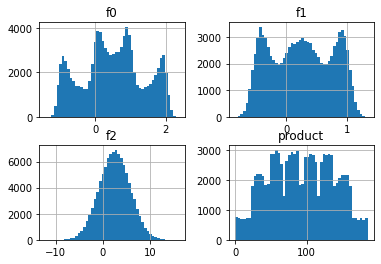

In [5]:
#region 0
display(data_0.head())
data_0.info()
len(data_0[data_0.duplicated()==True])
data_0.hist(bins=50)
data_0.corr().style.background_gradient(cmap=cm)

In [6]:
data_0['id'].value_counts().head(20)

AGS9W    2
HZww2    2
bxg6G    2
74z30    2
bsk9y    2
fiKDv    2
A5aEY    2
TtcGQ    2
QcMuo    2
Tdehs    2
UCupo    1
SIeAv    1
zrw9s    1
UazKa    1
hNLk3    1
Ew4c5    1
ktgOS    1
U4P78    1
FXzb5    1
wpLqE    1
Name: id, dtype: int64

In [7]:
data_0 = data_0.drop_duplicates(subset='id')

    f0, f1 are not normally distributed
    f2 has normal distribution

## Region 1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64
3.996243    1
4.003988    1
1.996189    1
0.996936    1
3.998589    1
           ..
1.004759    1
4.997377    1
3.003466    1
0.001041    1
4.992682    1
Name: f2, Length: 100000, dtype: int64


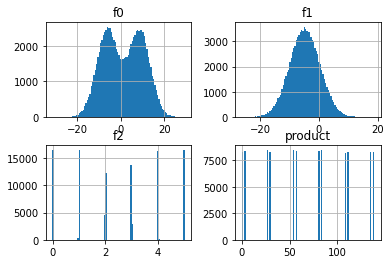

In [8]:
display(data_1.head())
data_1.info()
len(data_1[data_1.duplicated()==True])
data_1.hist(bins=100)
data_1.corr()
print(data_1['product'].value_counts())
print(data_1['f2'].value_counts())

In [9]:
data_1['id'].value_counts().head(20)

LHZR0    2
5ltQ6    2
wt4Uk    2
bfPNe    2
a2Nh8    1
uMvYH    1
62RQ1    1
xB3su    1
Mm77U    1
t8EK3    1
sBWwi    1
XOxbl    1
u5DsV    1
XSHS3    1
tUzHX    1
gaivD    1
FYQdM    1
bfRoa    1
kz9TK    1
Gbhhi    1
Name: id, dtype: int64

In [10]:
data_1 = data_1.drop_duplicates(subset='id')

In [11]:
data_1.corr().style.background_gradient(cmap=cm)

,f0,f1,f2,product
f0,1.000000,0.182279,-0.001810,-0.030523
f1,0.182279,1.000000,-0.002594,-0.010154
f2,-0.001810,-0.002594,1.000000,0.999397
product,-0.030523,-0.010154,0.999397,1.000000


    f0 has two peaks
    f1 has normal distribution
    f2 looks almost like discrete values though it is not
    product is a discrete value

A really strange data, especially parameter f2, that is strongly correlated with the target product

## Region 2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


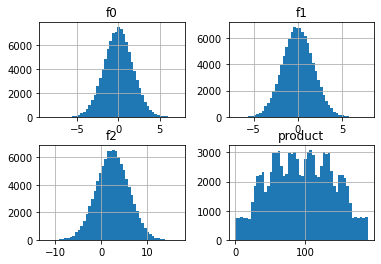

In [12]:
display(data_2.head())
data_2.info()
len(data_2[data_2.duplicated()==True])
data_2.hist(bins=50)
data_2.corr()

In [13]:
data_2['id'].value_counts().head(20)

VF7Jo    2
xCHr8    2
KUPhW    2
Vcm5J    2
gjD8X    1
57hvu    1
07xhk    1
7dFvf    1
NEpwL    1
jJwUz    1
OLzOW    1
PAWLQ    1
alZKI    1
8sjPy    1
bGDup    1
uArGD    1
rSRz5    1
dOHih    1
47V7z    1
Bhvau    1
Name: id, dtype: int64

In [14]:
data_2 = data_2.drop_duplicates(subset='id')

    f0, f1, f2 look like normally distributed
    product has several peaks

    no duplicates, no Nan, data are clear

# Linear Regression

## Prepare the data for training

In [15]:
#create features and target datasets

features_0 = data_0.drop(['id','product'], axis=1)
target_0 = data_0['product']

features_1 = data_1.drop(['id','product'], axis=1)
target_1 = data_1['product']

features_2 = data_2.drop(['id','product'], axis=1)
target_2 = data_2['product']

In [16]:
#split the data into train and validation datasets

#region 0
features_train_0, features_valid_0, target_train_0, target_valid_0 = (
    train_test_split(features_0, target_0, test_size=0.25, random_state=23) )

#region 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = (
    train_test_split(features_1, target_1, test_size=0.25, random_state=23) )

#region 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = (
    train_test_split(features_2, target_2, test_size=0.25, random_state=23) )

## Train linear regression

In [17]:
#region 0

#scale the features
scaler_0_norm = MinMaxScaler()
scaler_0_norm.fit(features_train_0)
features_train_0_norm = scaler_0_norm.transform(features_train_0)
features_valid_0_norm = scaler_0_norm.transform(features_valid_0)

model_0 = LinearRegression()
model_0.fit(features_train_0_norm, target_train_0)
predictions_0 = model_0.predict(features_valid_0_norm)
RMSE_0 = (mean_squared_error(target_valid_0, predictions_0)) ** 0.5

In [18]:
#region 1
scaler_1_norm = MinMaxScaler()
scaler_1_norm.fit(features_train_1)
features_train_1_norm = scaler_1_norm.transform(features_train_1)
features_valid_1_norm = scaler_1_norm.transform(features_valid_1)

model_1 = LinearRegression()
model_1.fit(features_train_1_norm, target_train_1)
predictions_1 = model_1.predict(features_valid_1_norm)
RMSE_1 = (mean_squared_error(target_valid_1, predictions_1)) ** 0.5

In [19]:
#region 2
scaler_2_norm = StandardScaler()
scaler_2_norm.fit(features_train_2)
features_train_2_norm = scaler_2_norm.transform(features_train_2)
features_valid_2_norm = scaler_2_norm.transform(features_valid_2)

model_2 = LinearRegression()
model_2.fit(features_train_2_norm, target_train_2)
predictions_2 = model_2.predict(features_valid_2_norm)
RMSE_2 = (mean_squared_error(target_valid_2, predictions_2)) ** 0.5

In [20]:
print('------------Region 0---------------')
print(f'RMSE in region 0 {RMSE_0}')
print(f'Mean oil volume in region 0 is {predictions_0.mean()}')
print('------------Region 1---------------')
print(f'RMSE in region 1 {RMSE_1}')
print(f'Mean oil volume in region 1 is {predictions_1.mean()}')
print('------------Region 2---------------')
print(f'RMSE in region 2 {RMSE_2}')
print(f'Mean oil volume in region 2 is {predictions_2.mean()}')

------------Region 0---------------
RMSE in region 0 37.80423300367874
Mean oil volume in region 0 is 92.4660743423489
------------Region 1---------------
RMSE in region 1 0.8878427799674208
Mean oil volume in region 1 is 68.81347102138069
------------Region 2---------------
RMSE in region 2 40.078967698039776
Mean oil volume in region 2 is 94.91760977948206


    According to  RMSE the best predictions are obtained for Region 1. But if one exclude correlated f2 feature, the quality of prediction strongly decreases. I used f2 for prediction because I don't see why I must drop it. 
    
    Mean oil volume in all three regions is less than it is necessary according to approximate calculations.

# Estimation of the target minimum oil volume

In [21]:
#minimum volume (min_vol) enough to cover expenditures
#TOTAL_BUDGET <= POINTS_BEST * vol * POINT_PROFIT
#min_vol = TOTAL_BUDGET / (POINTS_BEST * POINT_PROFIT)

min_vol = TOTAL_BUDGET / (POINTS_BEST * POINT_PROFIT)
print(f'minimum volume (min_vol) enough to cover expenditures {min_vol} barrels')

minimum volume (min_vol) enough to cover expenditures 111.11111111111111 barrels


    min_vol is more than mean predicted amount in all three regions
    have to work hard to choose points good enough

# Bootstrap

In [22]:
state = np.random.RandomState(23)

In [23]:
#fucntion for profit calculations

def max_profit(predictions,target):    
    return (target.loc[predictions.sort_values(ascending=False).index][:POINTS_BEST].sum() * POINT_PROFIT-TOTAL_BUDGET) 

In [24]:
#Bootstrap

predictions_list = [predictions_0, predictions_1, predictions_2]
target_list = [target_valid_0, target_valid_1, target_valid_2]

for i in range(len(predictions_list)): 
    profit = []

    target_np = np.array(target_list[i])
    indexes = range(len(target_np))
    
    for j in range(1000):
        indexes_sampled = np.random.choice(indexes, POINTS_CONSIDERED, replace=True)
        predictions_np = predictions_list[i]
        predictions = pd.Series(predictions_np[indexes_sampled])
        target = pd.Series(target_np[indexes_sampled]) 
        profit.append(max_profit(predictions, target))
    
    profit = pd.Series(profit)
    
    print(f'------------Region {i}----------------------')
    
    print(f'Средняя выручка {round(profit.mean()/1e6,2)} млн рублей')
    print(f'2.5% profit quantile {round(profit.quantile(0.025)/1e6,2)}')
    print(f'97.5% profit quantile {round(profit.quantile(0.975)/1e6,2)}')

    is_deficit = profit < 0
    print('Part of the risk {:.1%}'.format(is_deficit.mean())) 

------------Region 0----------------------
Средняя выручка 408.52 млн рублей
2.5% profit quantile -117.05
97.5% profit quantile 934.09
Part of the risk 6.2%
------------Region 1----------------------
Средняя выручка 451.47 млн рублей
2.5% profit quantile 41.74
97.5% profit quantile 853.02
Part of the risk 1.5%
------------Region 2----------------------
Средняя выручка 383.78 млн рублей
2.5% profit quantile -135.28
97.5% profit quantile 897.67
Part of the risk 7.0%


# Conclusion
    In this project we considered  three regions to assess the mean profit and risks in every region. Under a given budget for mining, the minimum enough oil volume in one point should be approx 111 barrels. Mean volume in all three regions is not enough. After applying the model to the mining points selection,  Region 1 satisfies the requirements. Approximate profit equals 462 000 000 rubles. Risk of negative profit for the Region 1 is less than 1%.
    
    NB. Results for Region 1 are consistent with the task only. So we must suggest Region 1 for oil production. But it is necessary to clarify the input data for they are too strange. In case the data for Region 1 are not reliable and we cannot use them for Region 1, no regions satisfy the requirements.